# Image Detection usinf CNN

1. Data Preparation: Image data is loaded from CSV files and preprocessed using data augmentation techniques.

2. Model Architecture: A Convolutional Neural Network (CNN) model is defined with convolutional and pooling layers, followed by dense layers for classification.

3. Model Training: The model is trained on the augmented data, optimizing binary cross-entropy loss.

4. Model Evaluation: The model's performance is evaluated on a separate test dataset, calculating test loss and accuracy.

5. Visualization: Training and validation accuracy/loss are plotted, and a confusion matrix is generated to assess model performance.

6. Prediction: A function is provided to predict labels for new images using the trained model.


In [10]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Load the training data from CSV

In [2]:
data_df = pd.read_csv('newtrain_data.csv')

In [3]:
data_folder_path = r'newtrain'

In [4]:
train_df, val_df = train_test_split(data_df, test_size=0.2, random_state=42)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=data_folder_path,
    x_col='image_name',
    y_col='label',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 1280 validated image filenames belonging to 2 classes.


In [8]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=data_folder_path,
    x_col='image_name',
    y_col='label',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 320 validated image filenames belonging to 2 classes.


Define the CNN model architecture

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [10]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15, 
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/15



20/20 [==============================] - 58s 3s/step - loss: 1.1471 - accuracy: 0.5188 - val_loss: 0.6707 - val_accuracy: 0.5875
Epoch 2/15
20/20 [==============================] - 54s 3s/step - loss: 0.6847 - accuracy: 0.5633 - val_loss: 0.6806 - val_accuracy: 0.6000
Epoch 3/15
20/20 [==============================] - 55s 3s/step - loss: 0.6723 - accuracy: 0.5875 - val_loss: 0.7801 - val_accuracy: 0.4156
Epoch 4/15
20/20 [==============================] - 55s 3s/step - loss: 0.6771 - accuracy: 0.5781 - val_loss: 0.6593 - val_accuracy: 0.6125
Epoch 5/15
20/20 [==============================] - 55s 3s/step - loss: 0.6584 - accuracy: 0.6164 - val_loss: 0.6436 - val_accuracy: 0.6031
Epoch 6/15
20/20 [==============================] - 55s 3s/step - loss: 0.6678 - accuracy: 0.5781 - val_loss: 0.6550 - val_accuracy: 0.5781
Epoch 7/15
20/20 [==============================] - 55s 3s/step - loss: 0.6435 - accuracy: 0.6320 - val_loss: 0.6342 - val_accuracy: 0.6125
Epoch 8/15
20/20 [=============

In [13]:
test_df = pd.read_csv('newtest_data.csv')

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=data_folder_path,
    x_col='image_name',
    y_col='label',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

Found 2 validated image filenames belonging to 2 classes.


C:\Users\prana\AppData\Roaming\Python\Python311\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 228 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


In [16]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 227ms/step - loss: 0.4791 - accuracy: 1.0000
Test Loss: 0.4790755808353424
Test Accuracy: 1.0


In [17]:
import matplotlib.pyplot as plt

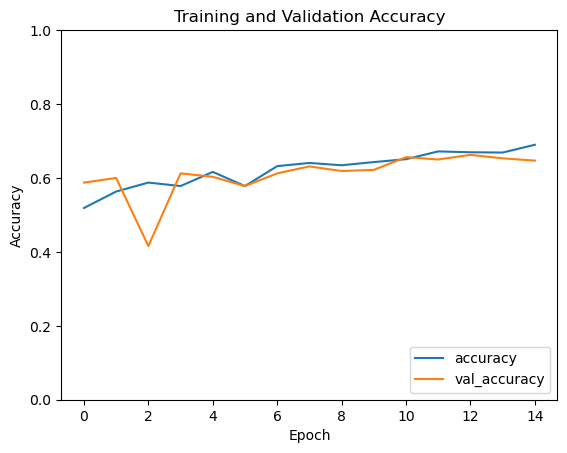

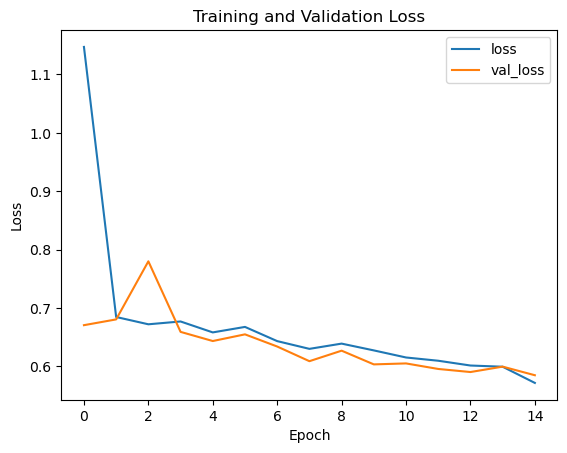

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [20]:
y_pred_probs = model.predict(test_generator)

1/1 [==============================] - 0s 412ms/step


In [21]:
y_pred = np.round(y_pred_probs)

In [22]:
y_true = test_generator.labels

In [23]:
conf_matrix = confusion_matrix(y_true, y_pred)

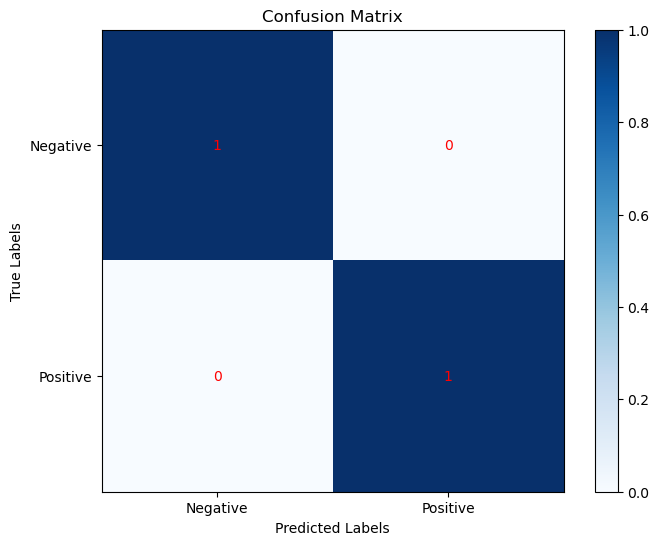

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [25]:
class_names = ['Negative', 'Positive']
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
    Positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [30]:
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model

model.save("saved_model")

loaded_model = tf.keras.models.load_model("saved_model")

joblib.dump(loaded_model, "model.pkl")

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


['model.pkl']

1/1 [==============================] - 0s 219ms/step


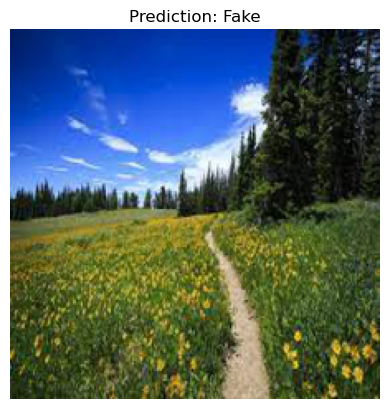

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image as keras_image

def predict_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        prediction_label = "Fake"
    else:
        prediction_label = "Real"

    return img, prediction_label

image_path = r'path_to_img1.jpg'
loaded_model = tf.keras.models.load_model("saved_model")
image, prediction_result = predict_image(image_path, loaded_model)


plt.imshow(image)
plt.title(f'Prediction: {prediction_result}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 210ms/step


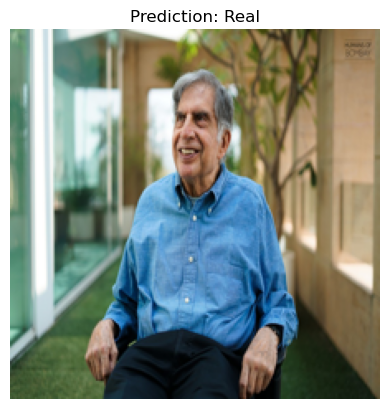

In [9]:
image_path = r'path_to_img.jpg'
loaded_model = tf.keras.models.load_model("saved_model")
image, prediction_result = predict_image(image_path, loaded_model)
plt.imshow(image)
plt.title(f'Prediction: {prediction_result}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 217ms/step


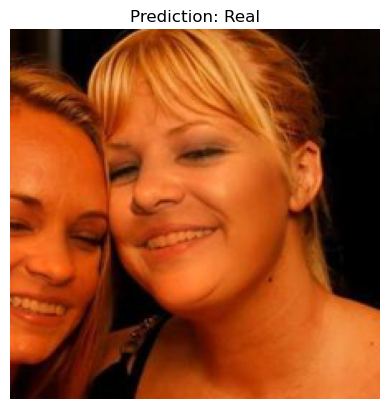

In [11]:
image_path = r'path_to_img4.jpg'
loaded_model = tf.keras.models.load_model("saved_model")
image, prediction_result = predict_image(image_path, loaded_model)
plt.imshow(image)
plt.title(f'Prediction: {prediction_result}')
plt.axis('off')
plt.show()